<a href="https://colab.research.google.com/github/bagastri07/k-nearest-neighbor/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K-Nearest Neighboor Task**

Written by **Bagas Tri Wibowo**, from Class **IF-43-04**, with Student Number **1301194051**

### **Import Library**

In [18]:
import sys
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import operator


### **Import Excel FIle**

In [19]:
df_car = pd.read_excel('mobil.xls')
pd.set_option('display.max_rows', None)
df_car

,Nama Mobil,Ukuran,Kenyamanan,Irit,Kecepatan,Harga (Ratus Juta)
0,Toyota Agya,4,4,9,6,1.00
1,Daihatsu Alya,4,3,9,6,1.10
2,Toyota Avanza,6,5,6,6,2.00
3,Daihatsu Xenia,6,4,6,6,1.75
4,Xpander,7,7,6,7,2.25
5,Livina,7,7,6,7,2.10
6,Karimun,3,4,10,5,1.20
7,Toyota Innova,8,8,5,7,4.00
8,Alphard,9,10,4,8,10.00
9,Toyota Vios,5,7,9,8,2.50



### **Delete Name Coloumn**

In [20]:
df_car_new = df_car.drop(columns=['Nama Mobil'])
df_car_new

,Ukuran,Kenyamanan,Irit,Kecepatan,Harga (Ratus Juta)
0,4,4,9,6,1.00
1,4,3,9,6,1.10
2,6,5,6,6,2.00
3,6,4,6,6,1.75
4,7,7,6,7,2.25
5,7,7,6,7,2.10
6,3,4,10,5,1.20
7,8,8,5,7,4.00
8,9,10,4,8,10.00
9,5,7,9,8,2.50



### **Statitistic of Each Data**

In [21]:
df_car.describe().T

,count,mean,std,min,25%,50%,75%,max
Ukuran,17.0,6.529412,2.034627,3.0,5.00,7.0,8.0,10.0
Kenyamanan,17.0,6.352941,2.234423,3.0,4.00,7.0,8.0,10.0
Irit,17.0,6.941176,1.784327,4.0,6.00,7.0,9.0,10.0
Kecepatan,17.0,6.823529,1.131111,5.0,6.00,7.0,8.0,9.0
Harga (Ratus Juta),17.0,3.247059,2.406597,0.8,1.75,2.3,5.0,10.0


### **Data Proccesing**
#### **Data Cleaning**
##### **For check if there missing value**

In [22]:
df_car.isna().sum()

Nama Mobil            0
Ukuran                0
Kenyamanan            0
Irit                  0
Kecepatan             0
Harga (Ratus Juta)    0
dtype: int64

In [23]:
'''
Uncomment the code below if there are missing values
'''
# df_car = df_car.apply(lambda x: x.fillna(x.mean()),axis=0)

'\nUncomment the code below if there are missing values\n'

##### **Check for Duplicates**

In [24]:
df_car.duplicated().sum()

0

##### **Check for Outliers With Boxplot**

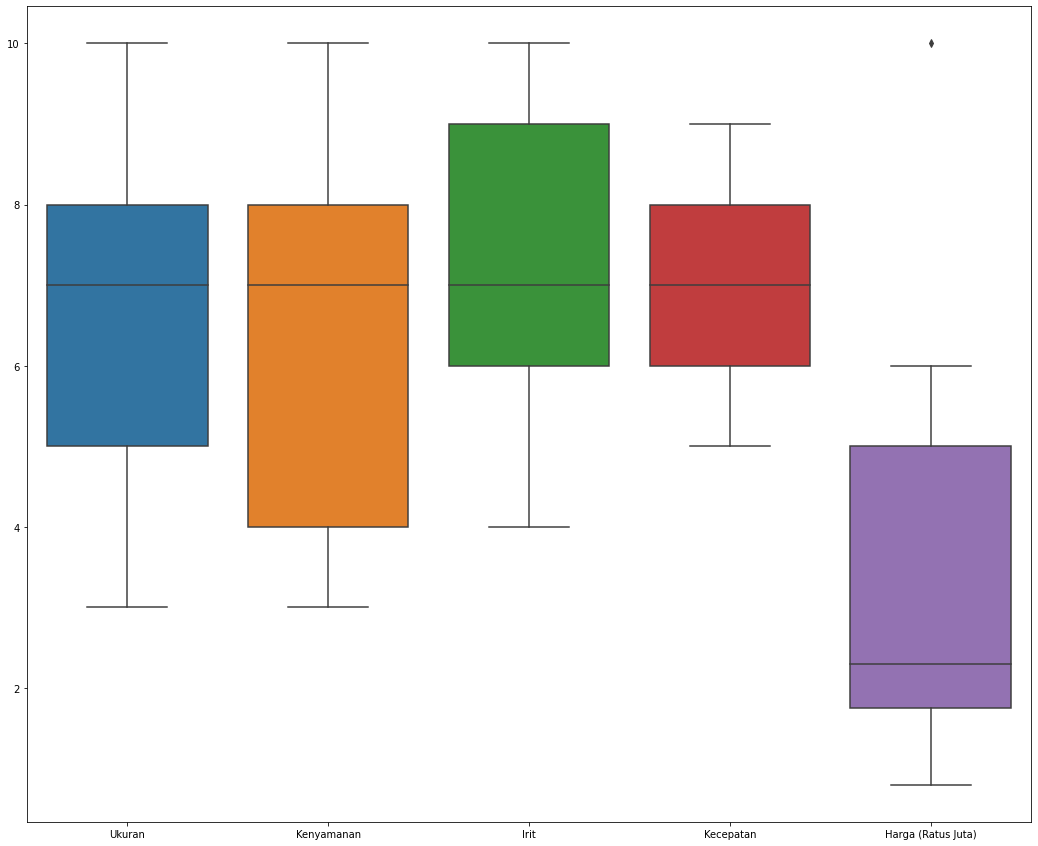

In [25]:
f, ax = plt.subplots(figsize=(18, 15))
sns.boxplot(data=(df_car))
plt.show()

As we can see above, there is an outliers on that bloxpot. This outliers it doesn't need to remove, because its just one outliers.

### **KKN Function and Procedures**
#### **Euclidian Dist**

In [26]:
def euclidian(criteria, data):
  dist = 0
  for i in range(len(data)):
    dist += (criteria[i] - data[i])**2
  return math.sqrt(dist)

#### **Manhattan Dist**

In [27]:
def manhattan(criteria, data):
  dist = 0
  for i in range(len(data)):
    dist += abs(criteria[i] - data[i])
  return dist

#### **Minkowski Dist**

In [28]:
def minkowski(criteria, data, p):
  dist = 0
  for i in range(len(data)):
    dist += abs(criteria[i] - data[i])**p
  return dist**(1/p)

#### **Supremum Dist**

In [29]:
def supremum(criteria, data):
  dist = []
  for i in range(len(data)):
    dist.append(abs(criteria[i] - data[i]))
  return max(dist)

#### **Get All Distances**

In [30]:
def get_distances(df, test_data):
  result = {
      'euclidian': [],
      'manhattan': [],
      'minkowski': [],
      'supremum': []
  }
  df_list = (df.copy()).values.tolist()
  df_car_new = df.drop(columns=['Nama Mobil'])
  data_number = len(df)
  for i in range(data_number):
    data_temp = df_car_new.iloc[i].tolist()
    result['euclidian'].append([df_list[i][0], euclidian(test_data, data_temp)])
    result['manhattan'].append([df_list[i][0], manhattan(test_data, data_temp)])
    result['minkowski'].append([df_list[i][0], minkowski(test_data, data_temp, 2)]),
    result['supremum'].append([df_list[i][0], supremum(test_data, data_temp)])

  return result

#### **Get Best Three of Each Distances Rule**

In [31]:
def get_best_three(df_car, data_distances):
  copy_distances = copy.deepcopy(data_distances)
  copy_distances['euclidian'].sort(key=operator.itemgetter(1), reverse=False)
  copy_distances['manhattan'].sort(key=operator.itemgetter(1), reverse=False)
  copy_distances['minkowski'].sort(key=operator.itemgetter(1), reverse=False)
  copy_distances['supremum'].sort(key=operator.itemgetter(1), reverse=False)

  copy_df_car = (df_car.copy()).values.tolist()

  best_three = []

  for i in range(3):
    car_name_eu = copy_distances['euclidian'][i][0]
    car_name_ma = copy_distances['manhattan'][i][0]
    car_name_mi = copy_distances['minkowski'][i][0]
    car_name_su = copy_distances['supremum'][i][0]

    eu_value = copy_distances['euclidian'][i][1]
    ma_value = copy_distances['manhattan'][i][1]
    mi_value = copy_distances['minkowski'][i][1]
    su_value = copy_distances['supremum'][i][1]

    best_three.append([car_name_eu, eu_value, car_name_ma, ma_value, car_name_mi, mi_value, car_name_su, su_value])

  return np.array(best_three)

### **Main Program | Proccess of KNN**
#### **Get User Input for Test Data**

In [32]:
ukuran = int(input("Masukan Ukuran		: "))
kenyamanan = int(input("Masukan Kenyamanan	: "))
irit = int(input("Masukan Irit		: "))
kecepatan = float(input("Masukan Kecepatan	: "))
harga = float(input("Harga			: "))

test_data = [ukuran, kenyamanan, irit, kecepatan, harga]

Masukan Ukuran		: 3
Masukan Kenyamanan	: 8
Masukan Irit		: 5
Masukan Kecepatan	: 10
Harga			: 2.4


#### **Get All Distances & Get Best Three of Each Distances Rule**

In [33]:
data_distances = get_distances(df_car, test_data)
best_three = get_best_three(df_car, data_distances)
data_final = pd.DataFrame(best_three, columns=['Euclidian', 'Eu Value', 'Manhattan', 'Ma Value', 'Minkowski', 'Mi Value', 'Supremum', 'Su Value'])
data_final


,Euclidian,Eu Value,Manhattan,Ma Value,Minkowski,Mi Value,Supremum,Su Value
0,Honda City,3.477067730142742,Honda City,6.300000000000001,Honda City,3.477067730142742,Honda City,2.0
1,Toyota Corolla Altis,4.791659420284375,Toyota Vios,9.1,Toyota Corolla Altis,4.791659420284375,Toyota Corolla Altis,3.6
2,Toyota Vios,5.000999900019995,Xpander,9.15,Toyota Vios,5.000999900019995,Toyota Agya,4.0


#### **Export to Excel**

In [34]:
file_path = 'rekomendasi.xlsx'
    
data_final.to_excel(file_path, index=False)